<h1 style="font-weight: bold"><center> Gemstone Price Prediction </center></h1>

<h3 style="font-weight: bold"><center> Introduction </center></h3>

The goal of the project is to predict the ***price*** of a given diamond (Regression Analysis). There are in total ***10*** independent variables and are listed as below: 
- **id**:  Unique identifier of each diamond.
- **Carat**:  Carat weight of the cubic zirconia.
- **Cut**:   Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good,  Premium, Ideal.
- **Color**:  Colour of the cubic zirconia.With D being the best and J the worst.
- **Clarity**:  Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.
- **Depth**:  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- **Table**:  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- **X**:  Length of the cubic zirconia in mm.
- **Y**:  Width of the cubic zirconia in mm.
- **Z**:  Height of the cubic zirconia in mm.

Target variable:
- **Price**:  The Price of the cubic zirconia.

Source: https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

<h3 style="font-weight: bold"><center> Dataset Reading/Importing </center></h3>

#### **Read Dataset**

In [42]:
import pandas as pd
df = pd.read_csv("./data/cubic_zirconia.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


#### **Dataset Infomation**

In [43]:
df = df.drop(labels=['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### **Checking Missing Values**

In [44]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

As seen from the above table that column **Depth** contains 697 samples that are not a number. To overcome this situation, there are three methods that replace NaN values with some other value of their own i.e., deleting, imputing, imputing for categorical values and using Missingness of a feature. However, for the sake generosity, I choose to use impute missing values.

In [54]:
import numpy as np
from sklearn.impute import IterativeImputer
df = df.replace(',,', np.nan)

num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
data = df[num_cols]
 
print("Original Data : \n", data[85:90])
impute_it = IterativeImputer()
data = impute_it.fit_transform(data)
print(data[85:90])


Original Data : 
     carat  depth  table     x     y     z  price
85   0.76   61.9   55.0  5.85  5.88  3.64   3016
86   0.74    NaN   59.0  5.92  5.97  3.52   2501
87   1.26   63.2   57.0  6.86  6.81  4.32   5306
88   0.41   63.1   56.0  4.75  4.72  2.99   1061
89   0.30   61.8   55.0  4.34  4.37  2.69    665


[[7.60000000e-01 6.19000000e+01 5.50000000e+01 5.85000000e+00
  5.88000000e+00 3.64000000e+00 3.01600000e+03]
 [7.40000000e-01 6.03182288e+01 5.90000000e+01 5.92000000e+00
  5.97000000e+00 3.52000000e+00 2.50100000e+03]
 [1.26000000e+00 6.32000000e+01 5.70000000e+01 6.86000000e+00
  6.81000000e+00 4.32000000e+00 5.30600000e+03]
 [4.10000000e-01 6.31000000e+01 5.60000000e+01 4.75000000e+00
  4.72000000e+00 2.99000000e+00 1.06100000e+03]
 [3.00000000e-01 6.18000000e+01 5.50000000e+01 4.34000000e+00
  4.37000000e+00 2.69000000e+00 6.65000000e+02]]


In [49]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Now, there are no missing values present in the dataset.

<h3 style="font-weight: bold"><center> Statistics </center></h3>

#### **Numerical and Categorical Columns Seperation**

In [5]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


#### **Numerical Columns Description**

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26270.0,0.797995,0.477214,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26270.0,57.456011,2.230776,49.0,56.00,57.00,59.00,79.00
x,26270.0,5.729167,1.127515,0.0,4.71,5.69,6.55,10.23
y,26270.0,5.732967,1.166330,0.0,4.72,5.70,6.54,58.90
z,26270.0,3.536636,0.699335,0.0,2.90,3.52,4.04,8.06
price,26270.0,3937.973734,4022.189341,326.0,945.00,2375.00,5361.00,18818.00


#### **Categorical Columns Description**

In [64]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,26270,5,Ideal,10546
color,26270,7,G,5529
clarity,26270,8,SI1,6408


#### **All unique values in dataset**

In [66]:
df.nunique()

carat       256
cut           5
color         7
clarity       8
depth       169
table       112
x           530
y           525
z           354
price      8629
dtype: int64

<h3 style="font-weight: bold"><center> Univariate Analysis </center></h3>

#### **Numerical Variables - Univariate Analysis**

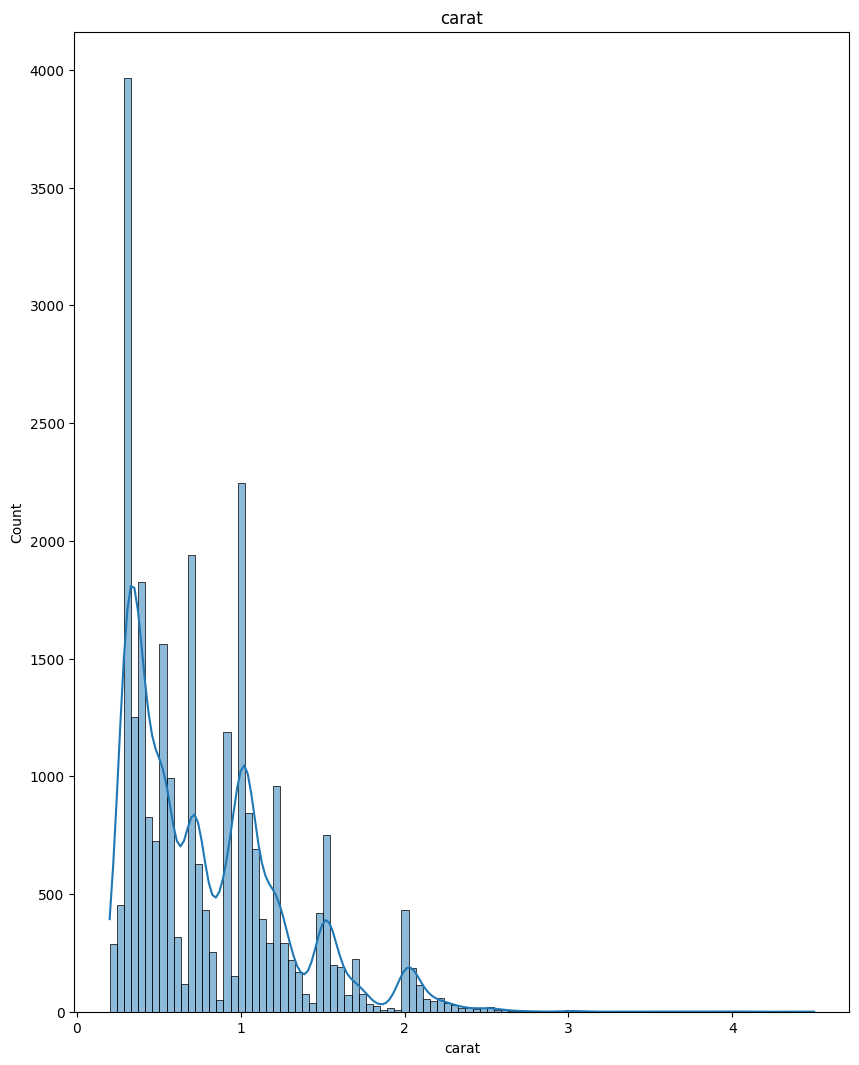

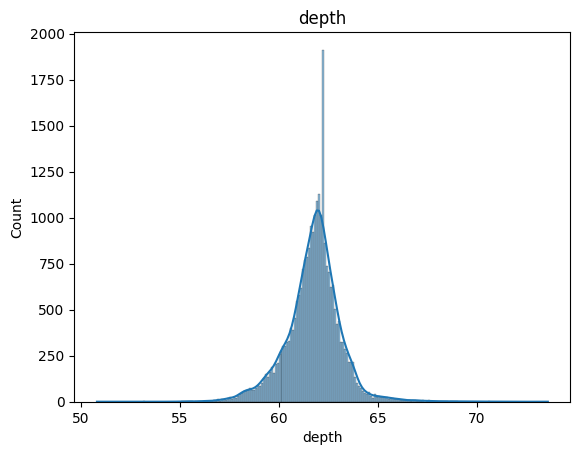

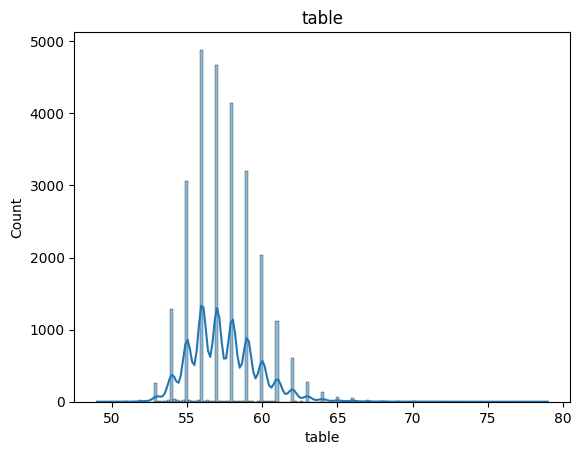

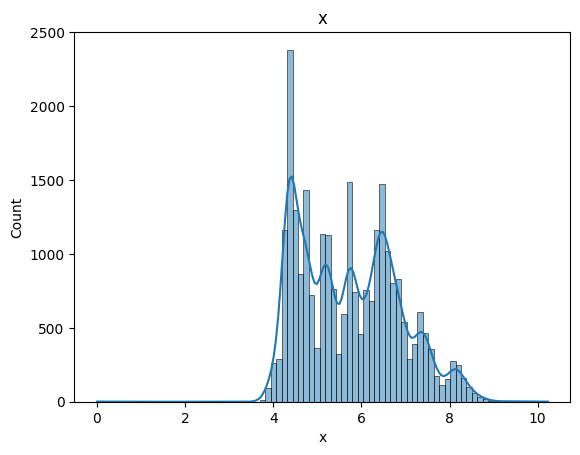

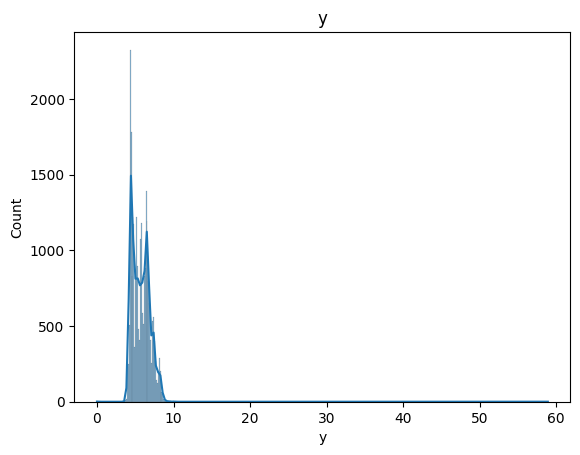

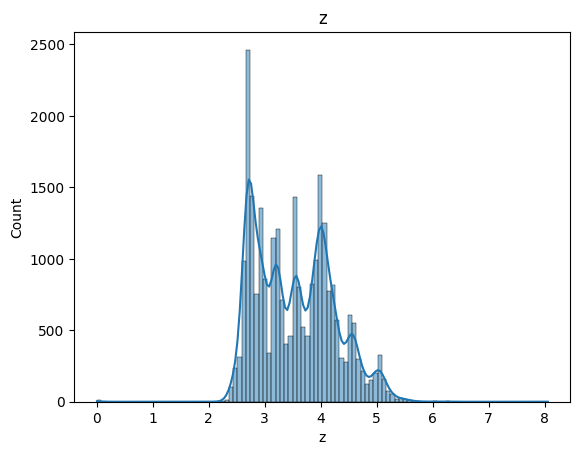

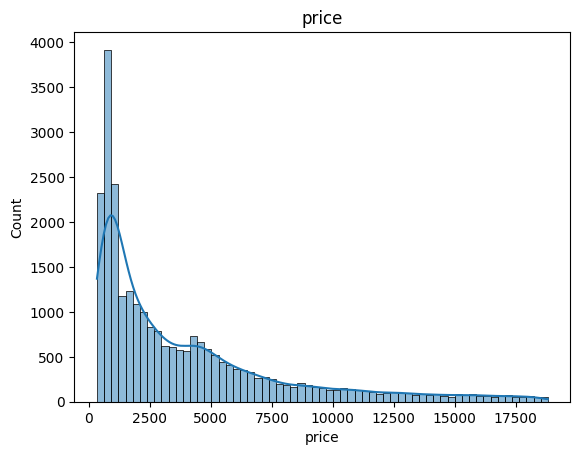

In [68]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.99,bottom=0.01,hspace=0.5,wspace=0.5)
x=1
for i in numerical_columns:
    sb.histplot(data=df,x=i,kde=True)
    plt.title(i)
    print('\n')
    plt.show()

#### **Categorical Variables - Univariate Analysis**

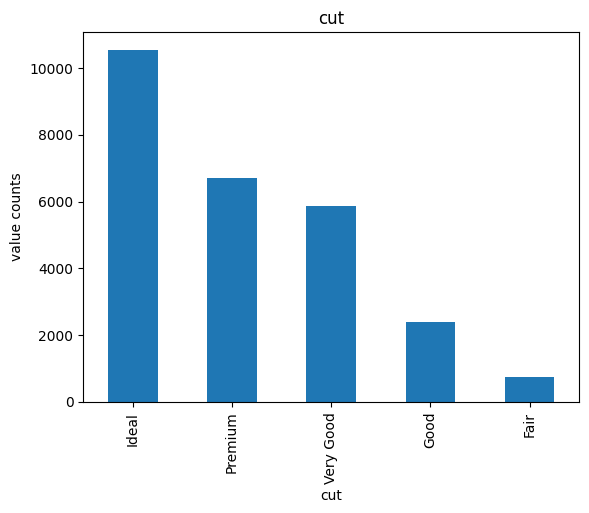

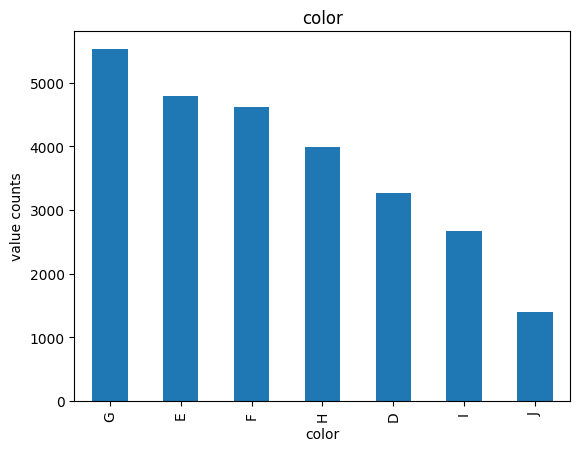

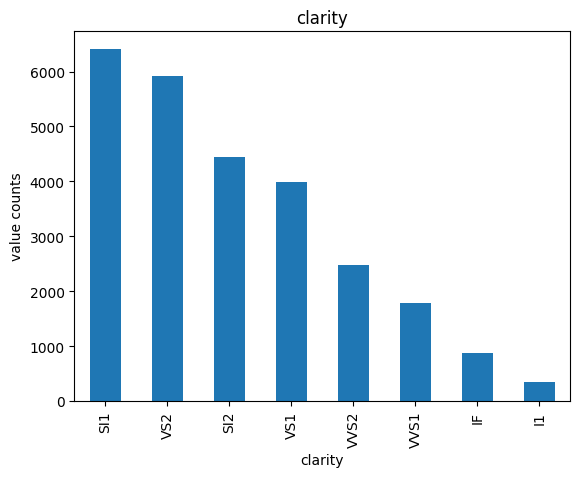

In [70]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar',xlabel=i,ylabel='value counts',title=i)
    print("\n")
    plt.show()

<h3 style="font-weight: bold"><center> Bivariate Analysis </center></h3>

#### **Correlation Map**

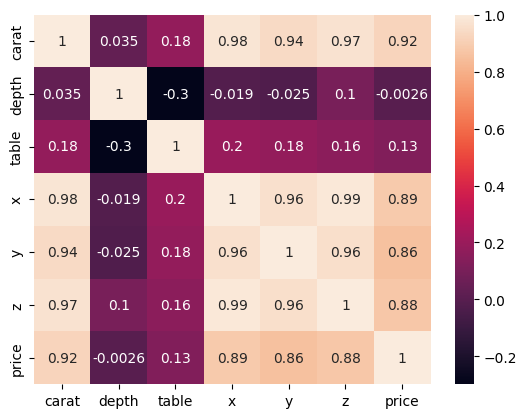

In [71]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#### **Pairplot**

d:\Projects\gemstonepriceprediction\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


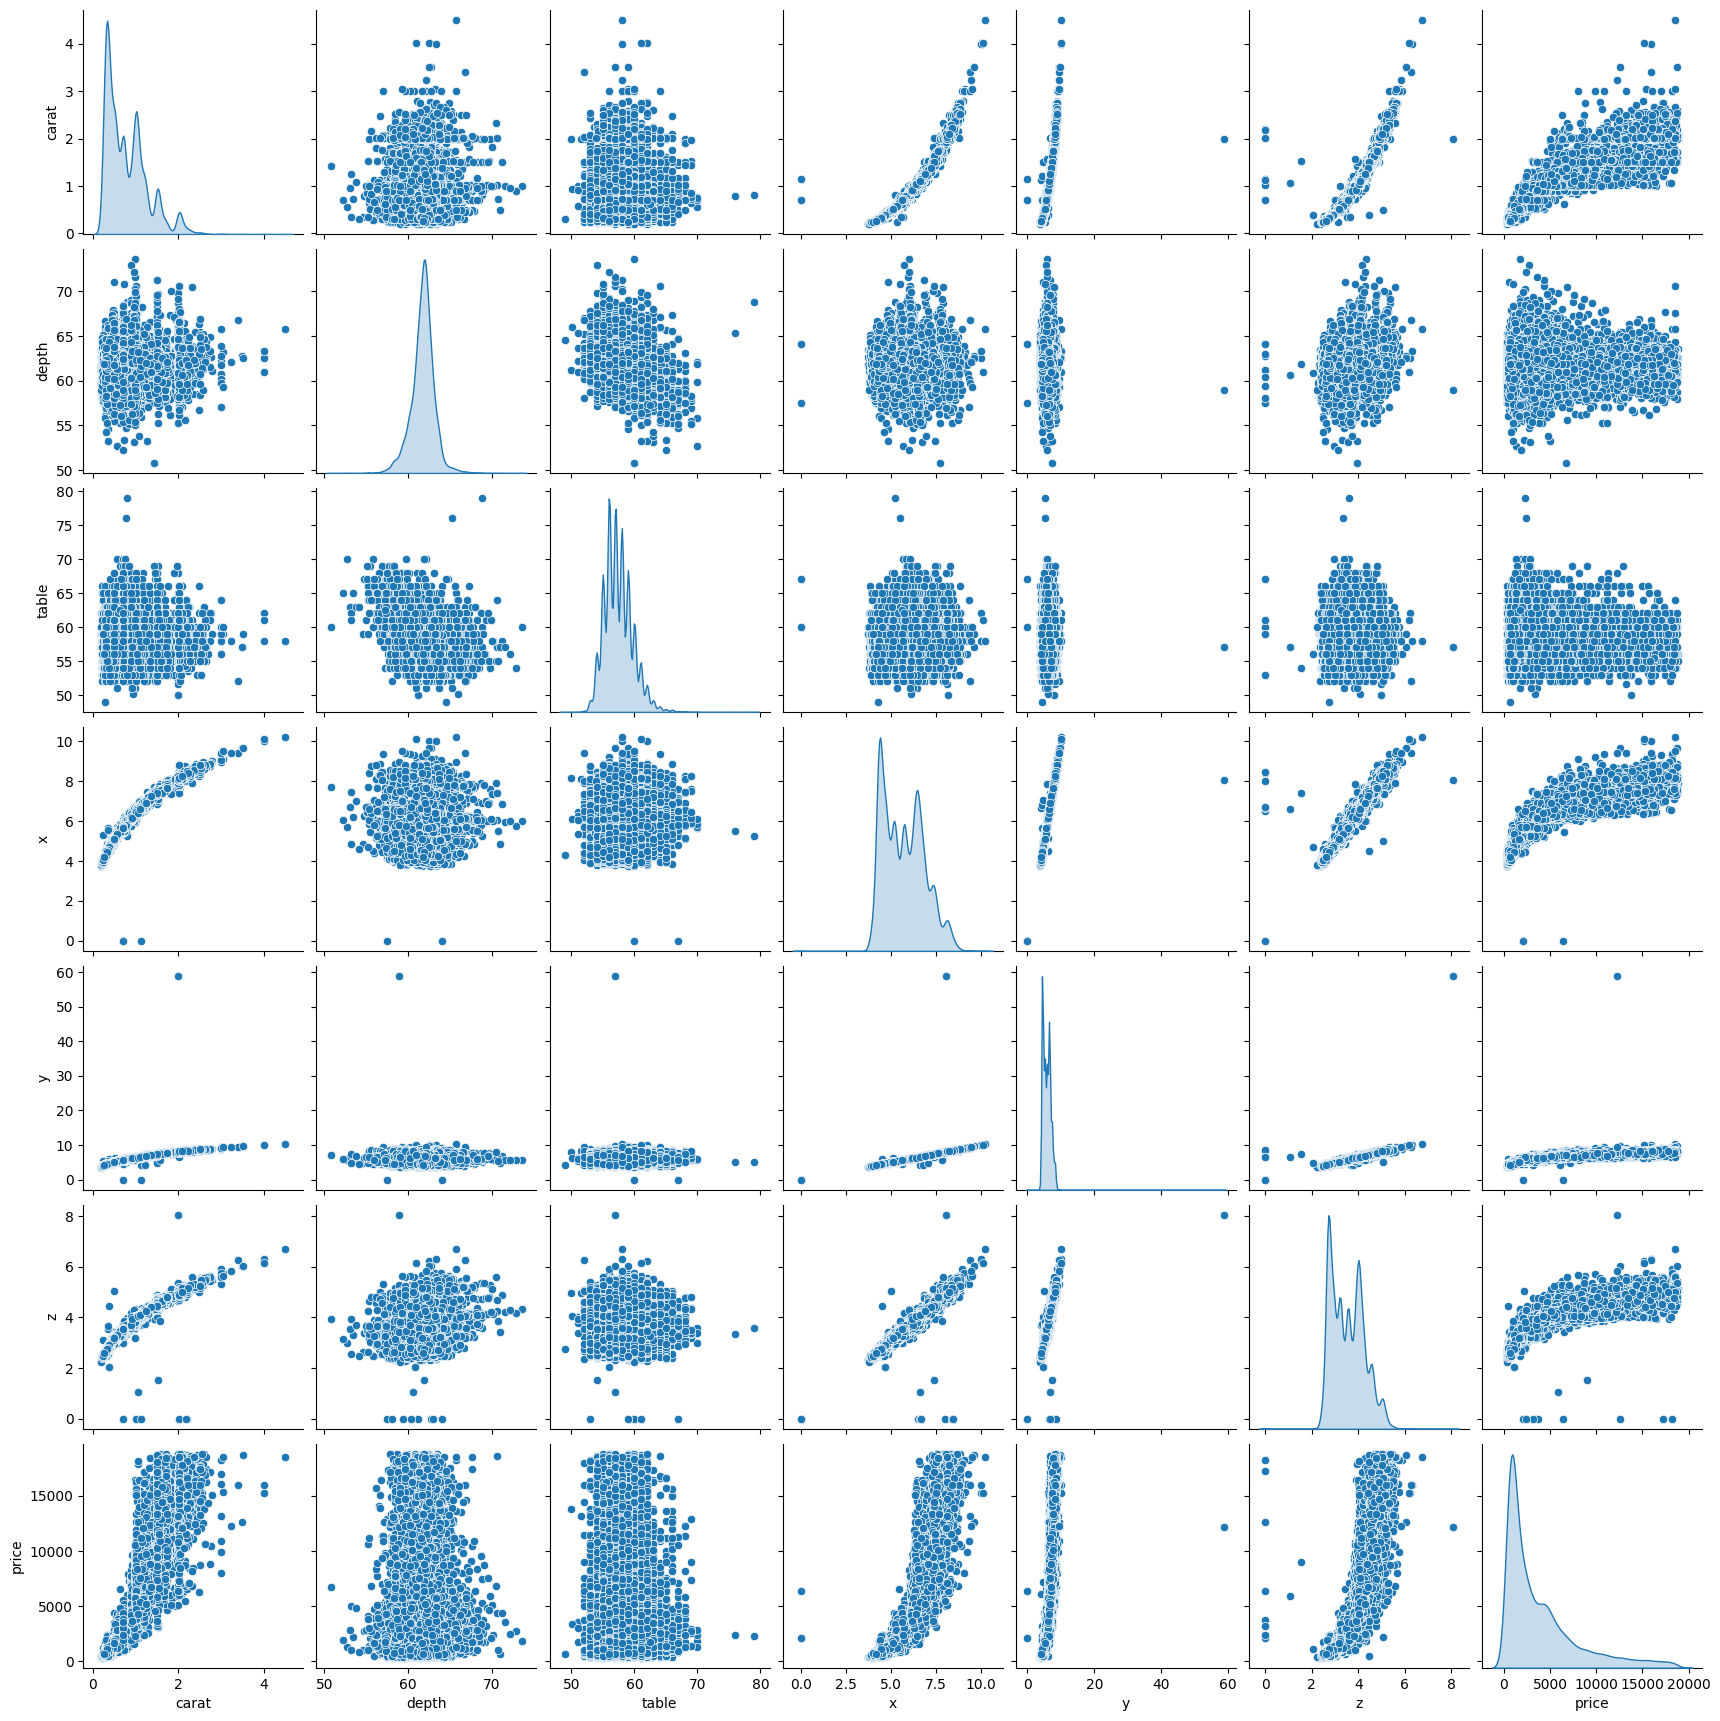

In [72]:
sb.pairplot(df,diag_kind='kde')
plt.show()


#### **Categorical Features vs Target Feature Price Boxplot**

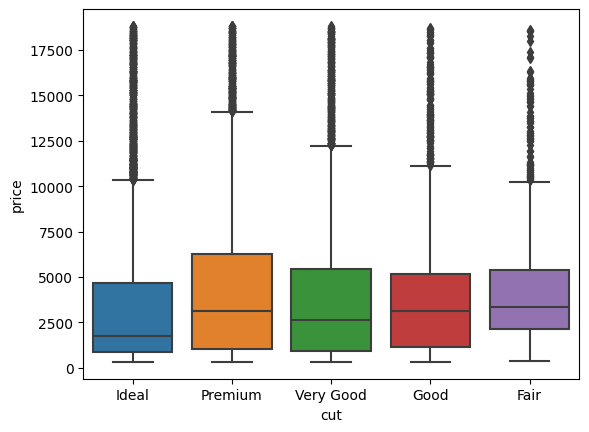

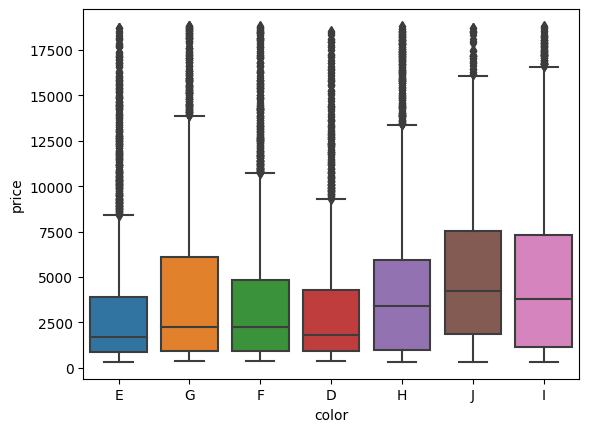

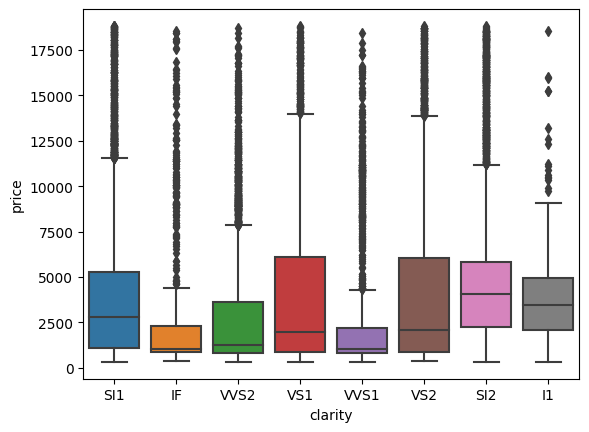

In [73]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()

<h3 style="font-weight: bold"><center> Mapping of Categorical Features </center></h3>

In [74]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779


<h3 style="font-weight: bold"><center> Mutual Information Score </center></h3> 

#### **Seperating X and Y**

In [75]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

#### **Calculating Mutual Infomation Score**

carat      1.848050
x          1.427828
y          1.425688
z          1.384956
clarity    0.325932
color      0.241510
cut        0.089115
table      0.047664
depth      0.029683
Name: MI Scores, dtype: float64


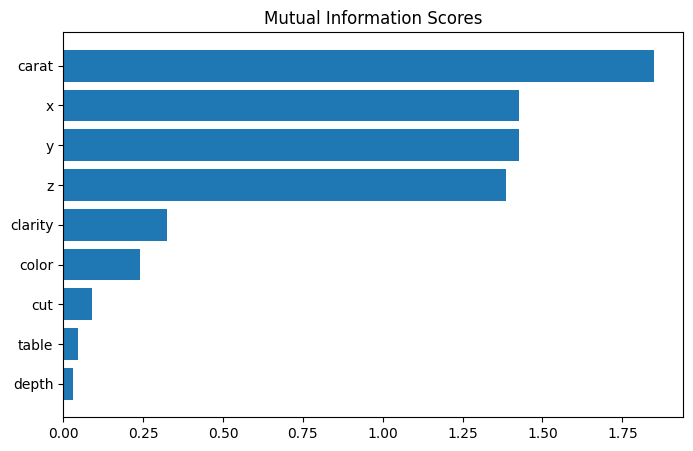

In [79]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

After applying Mutual Information, it is clear from the barplot that carat, x, y and z are the most important features to predict the price of a gemstone.
<h3 style="font-weight: bold"><center> Sequential Feature Selection </center></h3> 


[2023-08-20 16:35:13] Features: 1/9 -- score: 0.8537394081878442
[2023-08-20 16:35:17] Features: 2/9 -- score: 0.926725123263429
[2023-08-20 16:35:21] Features: 3/9 -- score: 0.9717356920886606
[2023-08-20 16:35:24] Features: 4/9 -- score: 0.9761618747592455
[2023-08-20 16:35:28] Features: 5/9 -- score: 0.9765443794843014
[2023-08-20 16:35:31] Features: 6/9 -- score: 0.9763342983622225
[2023-08-20 16:35:34] Features: 7/9 -- score: 0.9707217562128836
[2023-08-20 16:35:38] Features: 8/9 -- score: 0.9616464188600634
[2023-08-20 16:35:40] Features: 9/9 -- score: 0.9461084432231341

Best accuracy score: 0.98
Best subset (indices): (0, 2, 3, 7, 8)
Best subset (corresponding names): ('carat', 'color', 'clarity', 'y', 'z')


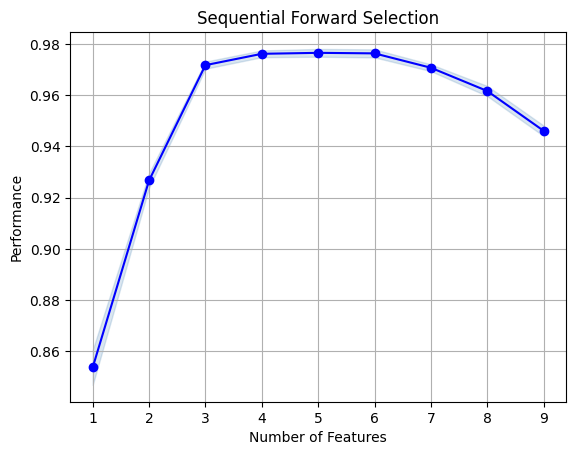

                   feature_idx avg_score
1                         (7,)  0.853739
2                       (3, 7)  0.926725
3                    (2, 3, 7)  0.971736
4                 (0, 2, 3, 7)  0.976162
5              (0, 2, 3, 7, 8)  0.976544
6           (0, 2, 3, 6, 7, 8)  0.976334
7        (0, 1, 2, 3, 6, 7, 8)  0.970722
8     (0, 1, 2, 3, 4, 6, 7, 8)  0.961646
9  (0, 1, 2, 3, 4, 5, 6, 7, 8)  0.946108


In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=5)
sfs1 = SFS(knn, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2')

sfs1=sfs1.fit(X,Y)

print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
print(df[["feature_idx","avg_score"]] )

From the above graph, it is clear that set of five features i.e., carat, x, y, color and clarity are most prominent features for the prediction of gemstone.